<a href="https://colab.research.google.com/github/czn-py/Deep-Learning-Project/blob/main/Heart_Disease_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Data

**ML Techniques Used : Logistic Regression &  Hierarchical Clustering**

**Background:**
Worldwide, heart disease affects a significant percentage of the population. It is one of the common and serious medical condition.For effective prevention, diagnosis, and treatment of heart disease, it is vital to understand the factors associated with heart disease and their predictors.

The dataset consists of various patient charasterstics, such as age, sex, chest pain type,cholesterol levels,blood pressure and other relevant attributes.

We will analyse this data set using various Machine Learning Techniques to access the variables and investigate them to predict the chances of developing heart disease.
The dataset consists of 14 attributes including the Target variable,and 270 observations. Further information about the variables has been provided below:

The dataset contains 13 independent features and 1 target feature as described below.


**Continous Variables:**
1. age
2. trestbps (resting blood pressure)
3. chol (serum cholestoral in mg/dl)
4. thalach (maximum heart rate achieved)
5. oldpeak = exercise induced ST Depression relative to rest
6. ca - number of major vessels (0-3)

**Categorical Variables:**
7. sex (1=male,0=Female)
8. cp (chest pain type) (4 values)
9. fbs (fasting blood sugar) > 120 mg/dl
10. restecg (resting ecg results) (3 values )
11. exang (exercise induced angina)
12. slope(slope of the peak exercise ST segment) (3 values)
13. thal: (Blood Disorder) (4 values)
14. target : Binary(0: Heart Disease,1: No Heart Disease)


# Descriptive Analysis and Cleaning

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
main_df= pd.read_csv('/content/drive/My Drive/MSDA/Heart_disease_statlog.csv')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools as tools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report


In [ ]:
display(main_df.head())
# Basic Info
main_df.info()

# Basic statistical info
main_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB
main_df:
 # Rows:270 , # Columns:14 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [ ]:
#printing out the dimensions
print('main_df:\n # Rows:{} , # Columns:{} '.format(main_df.shape[0],main_df.shape[1]))

main_df:
 # Rows:270 , # Columns:14 


In [ ]:
# Define mapping dictionaries
cp_mapping = {0: 'Typical Angina',
              1: 'Atypical Angina',
              2: 'Non-Anginal Pain',
              3: 'Asymptomatic'}

restecg_mapping = {0: 'Normal',
                   1: 'ST-T wave abnormality',
                   2: 'Left Ventricular Hypertrophy'}

slope_mapping = {0: 'Up-Sloping',
                 1: 'Flat',
                 2: 'Down-Sloping'}

thal_mapping = {0: 'Null',
                1: 'Normal Blood Flow',
                2: 'Fixed Defect',
                3: 'Reversible Defect'}

# Apply mappings to the columns
main_df['cp'] = main_df['cp'].map(cp_mapping)
main_df['restecg'] = main_df['restecg'].map(restecg_mapping)
main_df['slope'] = main_df['slope'].map(slope_mapping)
main_df['thal'] = main_df['thal'].map(thal_mapping)


In [ ]:
# Rename Columns for readability
main_df.columns = ['Age','Sex','Chest_Pain','Resting_BP','Cholesterol','Fasting_Blood_Sugar','Rest_ECG','Max_Heart_Rate','Exercise_Angina','Exercise_ST-Depression',
                   'ST_Segment_Slope','No_of_Vessels','Thal','Target']


In [ ]:
# View renamed columns
main_df.columns
main_df.head()


,Age,Sex,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Angina,Exercise_ST-Depression,ST_Segment_Slope,No_of_Vessels,Thal,Target
0,70,1,Asymptomatic,130,322,0,Left Ventricular Hypertrophy,109,0,2.4,Flat,3,Normal Blood Flow,1
1,67,0,Non-Anginal Pain,115,564,0,Left Ventricular Hypertrophy,160,0,1.6,Flat,0,Reversible Defect,0
2,57,1,Atypical Angina,124,261,0,Normal,141,0,0.3,Up-Sloping,0,Reversible Defect,1
3,64,1,Asymptomatic,128,263,0,Normal,105,1,0.2,Flat,1,Reversible Defect,0
4,74,0,Atypical Angina,120,269,0,Left Ventricular Hypertrophy,121,1,0.2,Up-Sloping,1,Normal Blood Flow,0


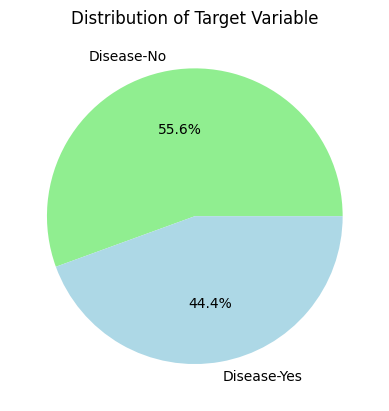

In [ ]:
# Distribution of the 'Target' variable
target_counts = main_df['Target'].value_counts()
labels = ['Disease-No', 'Disease-Yes']
colors = ['lightgreen', 'lightblue']
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
# Check for Null
#display(main_df)
display(main_df.isna().sum().sum())


0

In [ ]:
heart_df =main_df

***heart_df*** will be the final data that will be used for further analysis.Necessary
Encodings, cleaning and checking for null has been performed.

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     270 non-null    int64  
 1   Sex                     270 non-null    int64  
 2   Chest_Pain              270 non-null    object 
 3   Resting_BP              270 non-null    int64  
 4   Cholesterol             270 non-null    int64  
 5   Fasting_Blood_Sugar     270 non-null    int64  
 6   Rest_ECG                270 non-null    object 
 7   Max_Heart_Rate          270 non-null    int64  
 8   Exercise_Angina         270 non-null    int64  
 9   Exercise_ST-Depression  270 non-null    float64
 10  ST_Segment_Slope        270 non-null    object 
 11  No_of_Vessels           270 non-null    int64  
 12  Thal                    270 non-null    object 
 13  Target                  270 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory 

# Logistic Regression

In [ ]:
logreg_df = heart_df.copy()

In [ ]:
# Create the formula string
all_columns = ' + '.join(logreg_df.columns[:12])
formula = "Target ~ " + all_columns
print("Formula: ", formula, "\n")

Formula:  Target ~ Age + Sex + Chest_Pain + Resting_BP + Cholesterol + Fasting_Blood_Sugar + Rest_ECG + Max_Heart_Rate + Exercise_Angina + Exercise_ST-Depression + ST_Segment_Slope + No_of_Vessels 



First run the Logistic Regression Model by considering all the independent variables

In [ ]:
# Specify x and y variables
x= logreg_df.iloc[:,:-1]
x= pd.get_dummies(data = x,drop_first=True)
y= logreg_df['Target']

In [ ]:
# Split the data into test/train
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
# add constant to independent variable
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# Train the logistic regression with the training data
model=sm.Logit(y_train,x_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.316973
         Iterations 7


In [ ]:
# Display logistic Regression Results
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  216
Model:                          Logit   Df Residuals:                      197
Method:                           MLE   Df Model:                           18
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.5393
Time:                        00:13:47   Log-Likelihood:                -68.466
converged:                       True   LL-Null:                       -148.60
Covariance Type:            nonrobust   LLR p-value:                 7.401e-25
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.7145      3.477     -0.781      0.435      -9.530       4.101
Age                               -0.0300      0.030     -1.004      0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

 Disease-Yes       0.90      0.90      0.90        31
  Disease-No       0.87      0.87      0.87        23

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



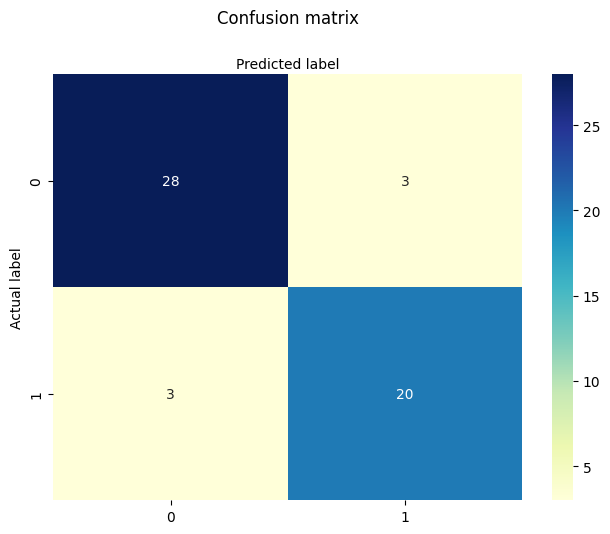

In [ ]:
# Recalculate logistic Regression again using sklearn for accuracy calculation
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

# create the confusion matrix;
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report
target_names = ['Disease-Yes','Disease-No']
print(classification_report(y_test,y_pred,target_names = target_names))

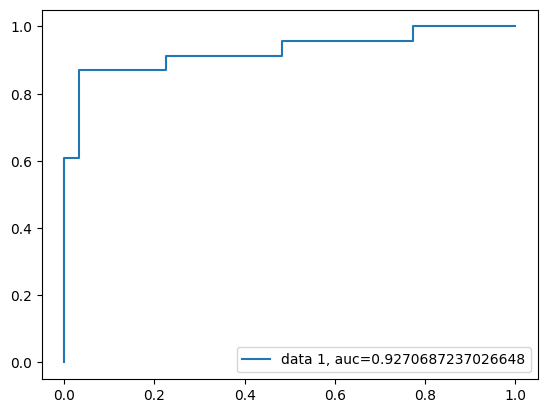

In [ ]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Dropping the variables with p >0.05 to filter out the insignificant variables and running the model again with the significant variables. Additionally,The variable 'Thal' has been dropped inspite having p < 0.05, because in the second run the variables turned insignificant

In [ ]:
filtered_columns = ' + '.join(logreg_df.columns[[1,2,4,11]])
formula = "Target ~ " + filtered_columns
print("Formula: ", formula, "\n")


Formula:  Target ~ Sex + Chest_Pain + Cholesterol + No_of_Vessels 



In [ ]:
# create new x & y to rerun the model with the insignificant variables dropped based on P-Values
x_nm = logreg_df[['Sex','Cholesterol','Chest_Pain','No_of_Vessels']]
x_nm = pd.get_dummies(data = x_nm, drop_first=True)
y_nm = logreg_df['Target']
y_nm = pd.get_dummies(data= y_nm, drop_first = True)
# Split the data into test/train
x_train1,x_test1,y_train1,y_test1= train_test_split(x_nm,y_nm,test_size=0.2)
# Add constant term to the independent variables
x_train1 = sm.add_constant(x_train1)
x_test1 = sm.add_constant(x_test1)

# Fit the logistic regression model on the training data
model1 = sm.Logit(y_train1, x_train1)
result1 = model1.fit()

# Display the regression results
print(result1.summary())


Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      1   No. Observations:                  216
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                     inf
Time:                        00:29:56   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.2824      1.106     -2.968      0.003      -5

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# Recalculate logistic Regression again using sklearn for accuracy calculation
logreg1 = LogisticRegression()
logreg1.fit(x_train1,y_train1)
y_pred1 = logreg1.predict(x_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

 Disease-Yes       0.86      0.80      0.83        30
  Disease-No       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



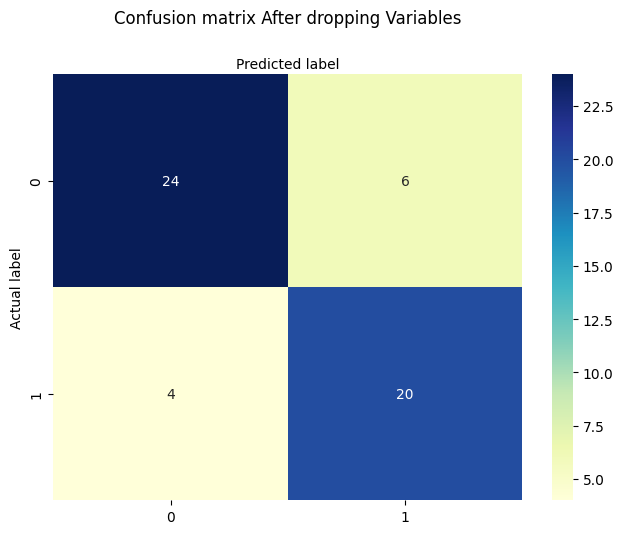

In [ ]:
# create the confusion matrix;
cnf_matrix1 = metrics.confusion_matrix(y_test1,y_pred1)
cnf_matrix1

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix After dropping Variables', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification Report
target_names = ['Disease-Yes','Disease-No']
print(classification_report(y_test1,y_pred1,target_names = target_names))

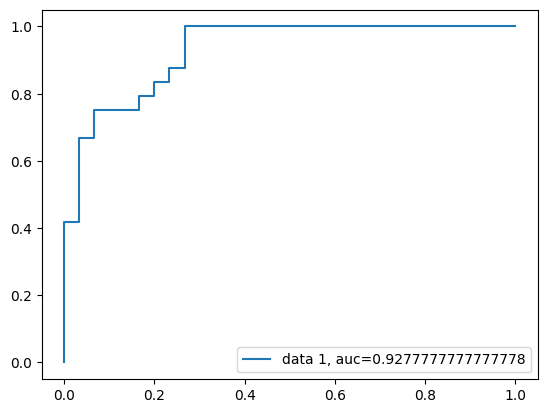

In [ ]:
# AUC
y_pred_proba1 = logreg1.predict_proba(x_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test1,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test1, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

# Prediction Using the Model

In [ ]:
# build dictionary for prediction
predict_data = pd.DataFrame({'Sex':[0,1,1,0],
                             'Cholesterol':[127,200,365,500],
                             'No_of_Vessels':[0,1,2,1],
                             'Chest_Pain':['Asymptomatic','Non-Anginal Pain','Typical Angina','Atypical Angina']})

display(predict_data)

,Sex,Cholesterol,No_of_Vessels,Chest_Pain
0,0,127,0,Asymptomatic
1,1,200,1,Non-Anginal Pain
2,1,365,2,Typical Angina
3,0,500,1,Atypical Angina


In [ ]:
# Make Prediciton using the model created for the above dataframe
# Code categorical variables
encoded = pd.get_dummies(data = predict_data,drop_first=True)
# use the model to predict the Target Variable
encoded = sm.add_constant(encoded)
prediction = logreg1.predict(encoded)
display(prediction)

array([0, 0, 1, 1], dtype=uint8)

# Summary: Logistic Regression

**Objective :** Build a predictive Model to classify patients if they have heart disease or not.

**Analytic Question :** What factors can be significant in predicting the model ?

The purpose of applying Logistic Regression is to develop a model which helps to predict the chances of someone having a heart disease based on the independent variables above. Besides prediction,my goal of the analysis was also to assess what are the significant attributes that contributes to somone having the heart disease?

The logistic regression model is run twice;first with all the independent variables in the dataset and second after dropping the insignificant variables (p>0.05).Some statistics of the logistic regression analysis conducted above are presented below:

**First run :**
*   Accurary : 89%
*   AUC :0.927
*   All Independent variables included

**Second Run:**
*   Accurary: 81%
*   Only Significant variables included
*   AUC : 0.927

In the second run, the variables that were not statistically significant (p < 0.05) were dropped, and an accuracy of 81% was obtained. Although the accuracy decreased, the model now includes only the variables that are statistically significant. This indicates that the remaining variables have a stronger association with the outcome. In this case, the second model with the significant variables might be more reliable for making predictions, as it focuses on the factors that have a clear impact on the outcome.

The AUC is 0.927 in both the runs which indicates that the model has higher ablility to correctly classify instances.

Confusion Matrix summarizes the predictions made by the model on test data and compares with the Acual Target. The confusion matrix of the final model shows 4 False Positives in actual class, and 6 False Negatives in predicted class were observed.

**Interpretation of the final Model :**
Significant Variables:
Sex,Cholesterol,No_of_Vessels, Chest_Pain. Chest_Pain_Assymptomatic has been used as the reference in Chest_Pain variable.

**The Model :**
ln[(P(Disease)/P(1-Disease))] = -3.2824+ 1.9020*Sex (1 if female,0 if male)+ 0.086*Cholesterol+ 1.0858*No_of_Vessels -2.2617* 0(if Chest_Pain_Atypical Angina)
                   -2.1554 *1(If Chest_Pain_Non-Anginal Pain)
                  -2.1990 *2(if Chest_Pain_Typical Angina)

**Constant (intercept):** The coefficient of -3.2824 represents the constant term or intercept of the logistic regression model. It indicates the log-odds of the target variable when all other independent variables are zero.It suggests that when all other variables are zero, the log-odds of the target variable decrease by 3.2824 units.

**Sex :** The coefficient of 1.9020 represents the effect of the "Sex" variable in the logistic regression model. Since it is positive, it indicates that being male is associated with an increase in the log-odds of the target variable.

**Cholesterol:** The coefficient of 0.0086 represents the effect of the "Cholesterol" variable. It suggests that for each unit increase in cholesterol, the log-odds of the target variable increase by 0.0086 units.

**No_of_Vessels**: The coefficient of 1.0858 represents the effect of the "No_of_Vessels" variable. It indicates that for each additional vessel present, the log-odds of the target variable increase by 1.0858 units.

**Chest_Pain_Atypical Angina, Chest_Pain_Non-Anginal Pain, Chest_Pain_Typical Angina:** These coefficients (-2.2617, -2.1554, and -2.1990, respectively) represent the effects of these different categories of the "Chest_Pain" variable . These coefficients indicate the change in log-odds of the target variable associated with each specific chest pain type, compared to the reference category chest_pain_Assymptomatic.

# Hierarchical Clustering

In [ ]:
clust_data= heart_df.copy() # Creating a copy of main DataFrame
hclust =clust_data.sample(n=50)
hclust.head()

,Age,Sex,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Angina,Exercise_ST-Depression,ST_Segment_Slope,No_of_Vessels,Thal,Target
259,43,1,Asymptomatic,150,247,0,Normal,171,0,1.5,Up-Sloping,0,Normal Blood Flow,0
126,62,1,Asymptomatic,120,267,0,Normal,99,1,1.8,Flat,2,Reversible Defect,1
64,63,1,Typical Angina,145,233,1,Left Ventricular Hypertrophy,150,0,2.3,Down-Sloping,0,Fixed Defect,0
252,44,1,Asymptomatic,112,290,0,Left Ventricular Hypertrophy,153,0,0.0,Up-Sloping,1,Normal Blood Flow,1
172,67,1,Asymptomatic,100,299,0,Left Ventricular Hypertrophy,125,1,0.9,Flat,2,Normal Blood Flow,1


In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, fcluster


In [ ]:
# Encoding the categorical variables
hclust_encoded = pd.get_dummies(data = hclust,drop_first=True)
# Normalize variables
data_scaler= StandardScaler()
scaled_data = data_scaler.fit_transform(hclust_encoded)
# Calculate distance between clusters using 'Average' method
average_clustering = linkage(scaled_data, method="average", metric="euclidean")


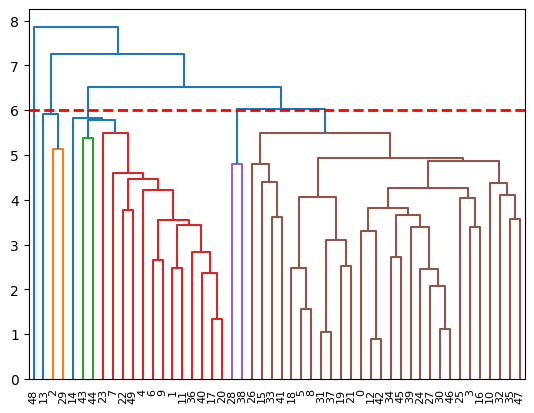

,Age,Sex,Chest_Pain,Resting_BP,Cholesterol,Fasting_Blood_Sugar,Rest_ECG,Max_Heart_Rate,Exercise_Angina,Exercise_ST-Depression,ST_Segment_Slope,No_of_Vessels,Thal,Target,Cluster
64,63,1,Typical Angina,145,233,1,Left Ventricular Hypertrophy,150,0,2.3,Down-Sloping,0,Fixed Defect,0,1
118,66,0,Typical Angina,150,226,0,Normal,114,0,2.6,Down-Sloping,0,Normal Blood Flow,0,1
210,59,1,Typical Angina,170,288,0,Left Ventricular Hypertrophy,159,0,0.2,Flat,0,Reversible Defect,1,1
61,51,0,Asymptomatic,130,305,0,Normal,142,1,1.2,Flat,0,Reversible Defect,1,2
20,67,1,Asymptomatic,120,229,0,Left Ventricular Hypertrophy,129,1,2.6,Flat,2,Reversible Defect,1,2
7,59,1,Asymptomatic,110,239,0,Left Ventricular Hypertrophy,142,1,1.2,Flat,1,Reversible Defect,1,2
163,58,1,Asymptomatic,128,259,0,Left Ventricular Hypertrophy,130,1,3.0,Flat,2,Reversible Defect,1,2
104,63,1,Asymptomatic,130,254,0,Left Ventricular Hypertrophy,147,0,1.4,Flat,1,Reversible Defect,1,2
17,53,1,Asymptomatic,140,203,1,Left Ventricular Hypertrophy,155,1,3.1,Down-Sloping,0,Reversible Defect,1,2
58,59,0,Asymptomatic,174,249,0,Normal,143,1,0.0,Flat,0,Normal Blood Flow,1,2


In [ ]:
# Create Dendrogram
dendrogram(average_clustering)
# Add horizontal line to indicate 5 clusters
cut_threshold = 6
plt.axhline(y= cut_threshold,color = 'r',linestyle = '--', linewidth =2)
plt.show()

# Add Cluster info to the original data
cluster_labels = fcluster(average_clustering,cut_threshold, criterion = 'distance')
hclust['Cluster']= cluster_labels
display(hclust.sort_values(by=['Cluster']))

# Summary: Hierarchical Clustering

**Objective :** Assign the data to appropriate number of clusters.

**Analytic Question:** How does hierarchical clustering reveal distinct patient groups based on their heart disease risk factors in the given heart prediction dataset?

The goal behind employing the hierarchial clustering was to identify the potential clusters or groups within the dataset. The clusters can be helpful to discover distinct subgroups of patients with different risk profiles or disease characterstics. The care and serivce can be designed to cater the needs based on the clusters discovered.

Average linkage clustering method has been applied to compute the distance between the clusters. so all the objects in each group are considered.

The clusters has been visualised using the Dendrogram and the dendrogram has been cut at the level 6 to create 5 clusters. The assigned cluster to each observation has been appended to the sampled data which can be used to group the patients based on their heart disease risk factors.
